# 1. Установка зависимостей

In [1]:
import tensorflow as tf
import os

In [2]:
# Установка режима использования только необходимого кол-ва мощностей GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Удаление неподходящих изображений

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Файл неподходящего формата {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Ошибка связанная с изображением {}'.format(image_path))

Файл неподходящего формата data\sexy\192px.svg
Файл неподходящего формата data\sexy\61416847.jpg
Файл неподходящего формата data\sexy\69995805.jpg
Файл неподходящего формата data\sexy\an-face-with-perfect-smile-closeup-of-beautiful-girl-face-with-bright-makeup.jpg
Файл неподходящего формата data\sexy\big-sexy-ass-close-face-600w-577487857.jpg
Файл неподходящего формата data\sexy\e-woman-outdoor-woman-with-brunette-hair-and-fresh-makeup-beauty-and-fashion.jpg
Файл неподходящего формата data\sexy\model-with-short-black-hair-style-and-red-lipstick.-vintage-closeup-portrait.jpg
Файл неподходящего формата data\sexy\nicki-minaj-sassy.gif
Файл неподходящего формата data\sexy\or-girl-with-water-on-cute-face-and-wet-long-brunette-hair-posing-outdoor-on.jpg
Файл неподходящего формата data\sexy\sexy-face-cyrkggiokn-605x1080.jpg
Файл неподходящего формата data\sexy\uhhhhh-sexy.gif
Файл неподходящего формата data\sexy\Untitled-5-4.jpg
Файл неподходящего формата data\sexy\vector.svg
Файл неподходяще

# 3. Загрузка данных

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [86]:
data = tf.keras.utils.image_dataset_from_directory('data',  image_size=(120, 120))

Found 394 files belonging to 2 classes.


In [87]:
tf.keras.utils.image_dataset_from_directory??

In [88]:
data_iterator = data.as_numpy_iterator()

In [89]:
batch = data_iterator.next()

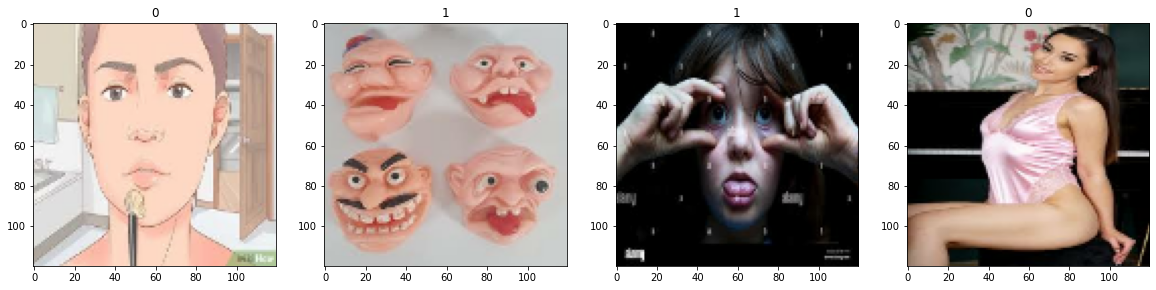

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Масштабирование данных

In [91]:
data = data.map(lambda x,y: (x/255, y))

In [92]:
data.as_numpy_iterator().next()

(array([[[[4.99006510e-01, 2.50346392e-01, 2.04447702e-01],
          [3.74049008e-01, 1.44833326e-01, 1.26058832e-01],
          [3.48415047e-01, 1.46045759e-01, 1.47598058e-01],
          ...,
          [5.11438698e-02, 1.58497524e-02, 2.76144594e-02],
          [7.07059503e-02, 3.54118310e-02, 4.71765362e-02],
          [1.02346599e-01, 6.70524836e-02, 7.88171887e-02]],
 
         [[5.19718885e-01, 2.72915065e-01, 2.32362762e-01],
          [2.90343136e-01, 7.01862723e-02, 4.89803888e-02],
          [3.47728789e-01, 1.49607852e-01, 1.45359486e-01],
          ...,
          [5.30229174e-02, 9.88566037e-03, 2.55719349e-02],
          [6.21569082e-02, 2.68627908e-02, 3.86274979e-02],
          [8.76766518e-02, 5.23825362e-02, 6.41472414e-02]],
 
         [[4.45555568e-01, 2.03137249e-01, 1.69003263e-01],
          [3.12401950e-01, 9.49509889e-02, 7.40196109e-02],
          [3.27124178e-01, 1.29003257e-01, 1.24754898e-01],
          ...,
          [5.28594367e-02, 9.72218253e-03, 2.5408

# 5. Разделение данных

In [93]:
len(data)

13

In [94]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [95]:
train_size+val_size+test_size

13

In [96]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Построение модели

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16

In [117]:
model = Sequential()

In [118]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(120,120,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [119]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 59, 59, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)     

# 7. Обучение

In [121]:
logdir='logs'

In [122]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [124]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback], batch_size=None)

Epoch 1/20
9/9 [==============================] - 2s 173ms/step - loss: 0.5116 - accuracy: 0.7326 - val_loss: 0.4203 - val_accuracy: 0.8125
Epoch 2/20
9/9 [==============================] - 2s 144ms/step - loss: 0.3910 - accuracy: 0.8264 - val_loss: 0.3480 - val_accuracy: 0.8542
Epoch 3/20
9/9 [==============================] - 2s 139ms/step - loss: 0.3476 - accuracy: 0.8507 - val_loss: 0.3936 - val_accuracy: 0.8229
Epoch 4/20
9/9 [==============================] - 2s 158ms/step - loss: 0.3242 - accuracy: 0.8438 - val_loss: 0.2776 - val_accuracy: 0.8958
Epoch 5/20
9/9 [==============================] - 2s 150ms/step - loss: 0.2204 - accuracy: 0.9201 - val_loss: 0.1661 - val_accuracy: 0.9583
Epoch 6/20
9/9 [==============================] - 2s 158ms/step - loss: 0.1827 - accuracy: 0.9306 - val_loss: 0.1408 - val_accuracy: 0.9583
Epoch 7/20
9/9 [==============================] - 2s 201ms/step - loss: 0.1233 - accuracy: 0.9618 - val_loss: 0.0984 - val_accuracy: 0.9583
Epoch 8/20
9/9 [====

# 8. Plot Performance

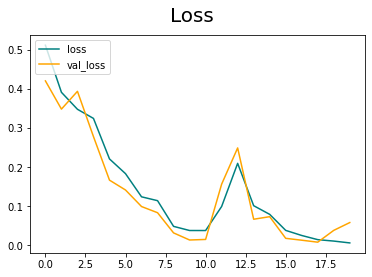

In [125]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

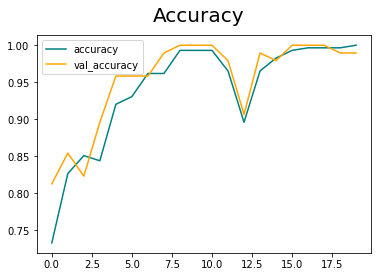

In [126]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Оценка

In [127]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [128]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [129]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 466ms/step


In [130]:
print(f'presicion:{pre.result().numpy()}, recall:{re.result().numpy()}, accuracy{acc.result().numpy()}')

presicion:1.0, recall:1.0, accuracy1.0


# 10. Тестирование

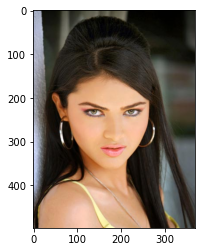

In [141]:
img = cv2.imread('data/13lfw1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

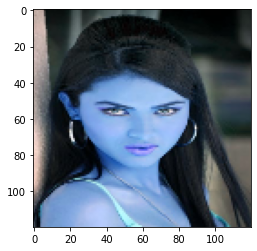

In [142]:
resize = tf.image.resize(img, (120,120))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [143]:
resize.shape

TensorShape([120, 120, 3])

In [144]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [145]:
yhat[0][0]

1.4063569e-09

In [146]:
if yhat > 0.5: 
    print(f'Ugly')
else:
    print(f'Sexy')

Sexy


# 11. Выгрузка модели

In [147]:
from tensorflow.keras.models import load_model

In [148]:
model.save(os.path.join('model','model.h5'))

In [149]:
new_model = load_model('model/model.h5')

In [150]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 84ms/step


array([[1.4063569e-09]], dtype=float32)

In [151]:
if yhat > 0.5: 
    print(f'Грустный')
else:
    print(f'Весёлый')

Весёлый
